# Data exploration:


In [1]:
import numpy as np
import pandas as pd 
import sklearn as sk
data = pd.read_csv("C:\\Users\\rire9\\OneDrive\\Documents\\final141Data.csv") 



c:\users\rire9\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,next_pymnt_d,application_type,tot_cur_bal,total_bal_il,pub_rec_bankruptcies,sec_app_mort_acc,disbursement_method,issue_year,issue_month,ID
0,1,2500,2500,2500.0,36 months,13.56,84.92,C,Chef,10+ years,...,Mar-2019,Individual,16901.0,12560.0,1.0,NaN,Cash,2018,12,1
1,2,30000,30000,30000.0,60 months,18.94,777.23,D,Postmaster,10+ years,...,Mar-2019,Individual,321915.0,87153.0,1.0,NaN,Cash,2018,12,2
2,3,5000,5000,5000.0,36 months,17.97,180.69,D,Administrative,6 years,...,Mar-2019,Individual,110299.0,7150.0,0.0,NaN,Cash,2018,12,3
3,4,4000,4000,4000.0,36 months,18.94,146.51,D,IT Supervisor,10+ years,...,Mar-2019,Individual,305049.0,30683.0,0.0,NaN,Cash,2018,12,4
4,5,30000,30000,30000.0,60 months,16.14,731.78,C,Mechanic,10+ years,...,Mar-2019,Individual,116007.0,28845.0,0.0,NaN,Cash,2018,12,5


In [3]:
print(data.columns)
data.shape

Index(['Unnamed: 0', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'earliest_cr_line', 'open_acc', 'total_pymnt',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'application_type',
       'tot_cur_bal', 'total_bal_il', 'pub_rec_bankruptcies',
       'sec_app_mort_acc', 'disbursement_method', 'issue_year', 'issue_month',
       'ID'],
      dtype='object')


(2260668, 31)

# If a person requires a loan,build a model to predict whether the guy is trustworthy enough to get fully funded based on his credit score, salary, state of residence, etc? For simplicity, you can set "1" if the guy can get full money, otherwise set "0". So this becomes a 2-class classification problem

To be able to understand if the loan was a succes"(fullly payed off on time) or not we have to understand what each label means:

Charge off means that the original creditor has given up on being repaid according to the original terms of the loan. It considers the remaining balance to be bad debt, but that doesn't mean you no longer owe the amount that has not been repaid.
In grace period:Still in time to pay but late
Late:havent payed full amount on time
Current:in process
Fully paid:Payed on time

For the purpose of  creating a model we decided to remove the current loans(the ones that are still in procces) since we dont know if this will end in "fail to pay" or "fully payed" so we will create a model using all rows besideds thew current ones.

To be able to categorize this model we will treat the status of loan of the remaining rows as:

If is fully paid we will assign the category of 1 and if the loan is in a status of anything else we will treat it as the category 0. Which will be the metric that determine if we should lean to his indivvual or not.

We will be using a diferent tyopes of modles to be able to create a model that can categorizre if a new costumer will pay off the loan. Based on that information we should determine if we should loan the amount of not.


First we will create dumy variables for the nominal categories:

In [4]:
data=data[data['loan_status']!="Current"]
data_dummis=pd.get_dummies(data[["issue_month","emp_length","term","grade","home_ownership","purpose","addr_state","application_type","disbursement_method"]])
print(data_dummis.shape)
data_dummis.columns

(1340973, 96)


Index(['issue_month', 'emp_length_1 year', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
       'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years',
       'emp_length_8 years', 'emp_length_9 years', 'emp_length_< 1 year',
       'term_36 months', 'term_60 months', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'addr_state_AK', 'addr_state_AL',
       'addr_state_AR', 'addr_state_AZ', 'addr_state_

In [5]:
data1=pd.concat([data, data_dummis], axis=1)
data1.shape


(1340973, 127)

In [65]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
display(data1.sort_values(by=['ID']).head())

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,earliest_cr_line,open_acc,total_pymnt,last_pymnt_d,last_pymnt_amnt,application_type,tot_cur_bal,pub_rec_bankruptcies,disbursement_method,issue_year,issue_month,ID,issue_month,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,term_36 months,term_60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
100,30000,30000,30000.0,36 months,22.35,1151.16,D,5 years,MORTGAGE,100000.0,Dec-2018,Fully Paid,debt_consolidation,CA,Jan-2012,11.0,30026.442500,Jan-2019,30082.32,Joint App,472330.0,1.0,Cash,2018,12,101,12,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
152,40000,40000,40000.0,60 months,16.14,975.71,C,< 1 year,MORTGAGE,45000.0,Dec-2018,Fully Paid,credit_card,OH,Jun-2009,18.0,40856.678960,Feb-2019,40910.48,Joint App,271068.0,0.0,Cash,2018,12,153,12,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
170,20000,20000,20000.0,36 months,7.56,622.68,A,10+ years,MORTGAGE,100000.0,Dec-2018,Fully Paid,credit_card,WA,Feb-1999,9.0,20215.792430,Feb-2019,20228.39,Joint App,515779.0,0.0,Cash,2018,12,171,12,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
186,4500,4500,4500.0,36 months,11.31,147.99,B,10+ years,RENT,38500.0,Dec-2018,Fully Paid,credit_card,TX,Dec-2003,12.0,4549.217149,Feb-2019,4553.46,Individual,29137.0,0.0,Cash,2018,12,187,12,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
215,8425,8425,8425.0,36 months,27.27,345.18,E,3 years,MORTGAGE,450000.0,Dec-2018,Fully Paid,credit_card,MA,Oct-1997,21.0,8735.148975,Feb-2019,8754.30,Joint App,690320.0,0.0,Cash,2018,12,216,12,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [7]:
"we drop the title since there are to many categories, also since we have income that should have a direct relation the the position"

data1=data1.drop(["emp_title"], axis=1)
data1=data1.drop(["Unnamed: 0"], axis=1)
print(data1.shape)
data1.columns

(1340973, 125)


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       ...
       'addr_state_VA', 'addr_state_VT', 'addr_state_WA', 'addr_state_WI', 'addr_state_WV', 'addr_state_WY', 'application_type_Individual', 'application_type_Joint App', 'disbursement_method_Cash', 'disbursement_method_DirectPay'], dtype='object', length=125)

In [64]:
display(data1.head())
data1.shape

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,earliest_cr_line,open_acc,total_pymnt,last_pymnt_d,last_pymnt_amnt,application_type,tot_cur_bal,pub_rec_bankruptcies,disbursement_method,issue_year,issue_month,ID,issue_month,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,term_36 months,term_60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
100,30000,30000,30000.0,36 months,22.35,1151.16,D,5 years,MORTGAGE,100000.0,Dec-2018,Fully Paid,debt_consolidation,CA,Jan-2012,11.0,30026.442500,Jan-2019,30082.32,Joint App,472330.0,1.0,Cash,2018,12,101,12,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
152,40000,40000,40000.0,60 months,16.14,975.71,C,< 1 year,MORTGAGE,45000.0,Dec-2018,Fully Paid,credit_card,OH,Jun-2009,18.0,40856.678960,Feb-2019,40910.48,Joint App,271068.0,0.0,Cash,2018,12,153,12,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
170,20000,20000,20000.0,36 months,7.56,622.68,A,10+ years,MORTGAGE,100000.0,Dec-2018,Fully Paid,credit_card,WA,Feb-1999,9.0,20215.792430,Feb-2019,20228.39,Joint App,515779.0,0.0,Cash,2018,12,171,12,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
186,4500,4500,4500.0,36 months,11.31,147.99,B,10+ years,RENT,38500.0,Dec-2018,Fully Paid,credit_card,TX,Dec-2003,12.0,4549.217149,Feb-2019,4553.46,Individual,29137.0,0.0,Cash,2018,12,187,12,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
215,8425,8425,8425.0,36 months,27.27,345.18,E,3 years,MORTGAGE,450000.0,Dec-2018,Fully Paid,credit_card,MA,Oct-1997,21.0,8735.148975,Feb-2019,8754.30,Joint App,690320.0,0.0,Cash,2018,12,216,12,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


(1340973, 122)

In [9]:

"if we delete all rows that have any soprt of NaN our datasa et becomes to small and to fit a machine learning model would be to hard"
"so we need to find another way to fix NAN"

data1_noNA=data1.dropna()
data1.shape


(1340973, 125)

In [10]:
import missingno 

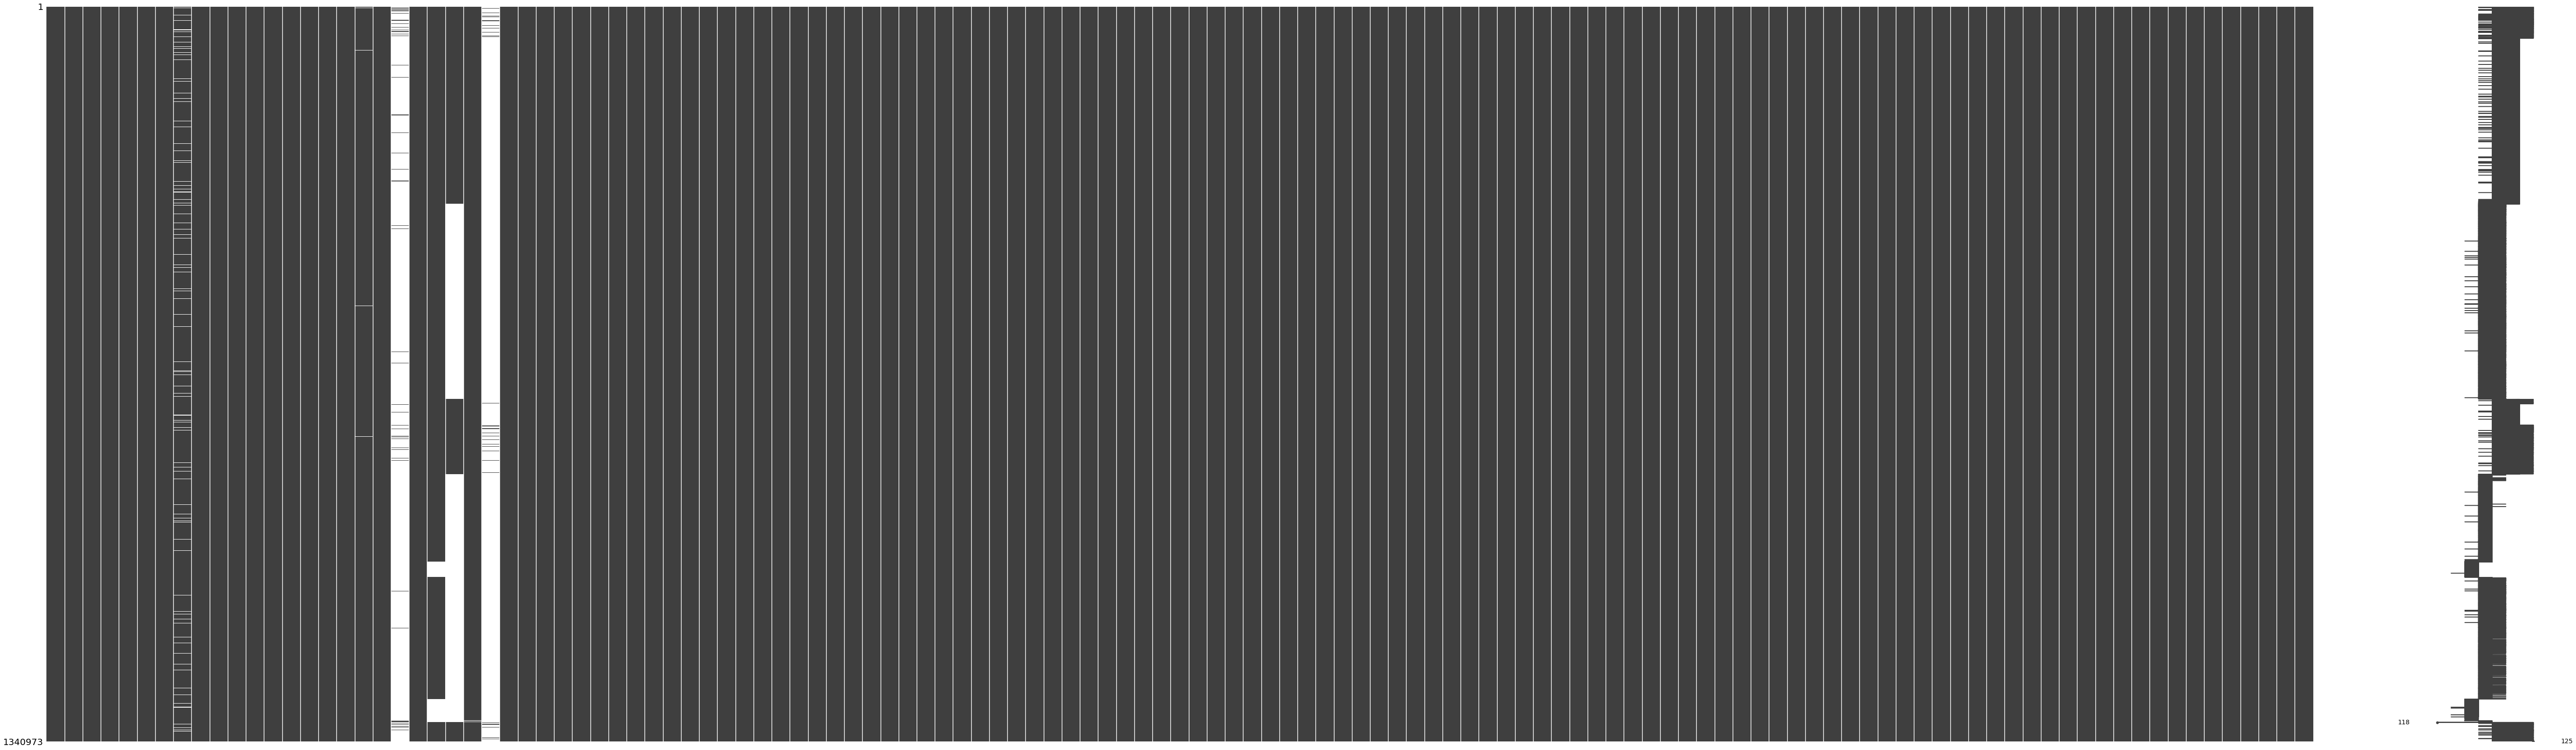

In [11]:
missingno.matrix(data1,figsize=(100,30))

In [12]:
data1.isna().sum()

loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
grade                                  0
emp_length                         78428
home_ownership                         0
annual_inc                             4
issue_d                                0
loan_status                            0
purpose                                0
addr_state                             0
earliest_cr_line                      29
open_acc                              29
total_pymnt                            0
last_pymnt_d                        2426
last_pymnt_amnt                        0
next_pymnt_d                     1303607
application_type                       0
tot_cur_bal                        70276
total_bal_il                      809794
pub_rec_bankruptcies                1365
sec_app_mort_acc

So we can see how we should get rid completly of atleast 3 columns since we dont have nought data

In [13]:
data1=data1.drop(["next_pymnt_d","total_bal_il","sec_app_mort_acc"], axis=1)


In [14]:
data1.isna().sum()

loan_amnt                            0
funded_amnt                          0
funded_amnt_inv                      0
term                                 0
int_rate                             0
installment                          0
grade                                0
emp_length                       78428
home_ownership                       0
annual_inc                           4
issue_d                              0
loan_status                          0
purpose                              0
addr_state                           0
earliest_cr_line                    29
open_acc                            29
total_pymnt                          0
last_pymnt_d                      2426
last_pymnt_amnt                      0
application_type                     0
tot_cur_bal                      70276
pub_rec_bankruptcies              1365
disbursement_method                  0
issue_year                           0
issue_month                          0
ID                       

In [15]:
data2_noNA=data1.dropna()
data2_noNA.shape

(1192258, 122)

In [16]:
"we only less than10% of our data set so its fine let keep going"

'we only less than10% of our data set so its fine let keep going'

In [17]:
data2_noNA.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,earliest_cr_line,open_acc,total_pymnt,last_pymnt_d,last_pymnt_amnt,application_type,tot_cur_bal,pub_rec_bankruptcies,disbursement_method,issue_year,issue_month,ID,issue_month,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,term_36 months,term_60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
100,30000,30000,30000.0,36 months,22.35,1151.16,D,5 years,MORTGAGE,100000.0,Dec-2018,Fully Paid,debt_consolidation,CA,Jan-2012,11.0,30026.442500,Jan-2019,30082.32,Joint App,472330.0,1.0,Cash,2018,12,101,12,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
152,40000,40000,40000.0,60 months,16.14,975.71,C,< 1 year,MORTGAGE,45000.0,Dec-2018,Fully Paid,credit_card,OH,Jun-2009,18.0,40856.678960,Feb-2019,40910.48,Joint App,271068.0,0.0,Cash,2018,12,153,12,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
170,20000,20000,20000.0,36 months,7.56,622.68,A,10+ years,MORTGAGE,100000.0,Dec-2018,Fully Paid,credit_card,WA,Feb-1999,9.0,20215.792430,Feb-2019,20228.39,Joint App,515779.0,0.0,Cash,2018,12,171,12,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
186,4500,4500,4500.0,36 months,11.31,147.99,B,10+ years,RENT,38500.0,Dec-2018,Fully Paid,credit_card,TX,Dec-2003,12.0,4549.217149,Feb-2019,4553.46,Individual,29137.0,0.0,Cash,2018,12,187,12,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
215,8425,8425,8425.0,36 months,27.27,345.18,E,3 years,MORTGAGE,450000.0,Dec-2018,Fully Paid,credit_card,MA,Oct-1997,21.0,8735.148975,Feb-2019,8754.30,Joint App,690320.0,0.0,Cash,2018,12,216,12,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [18]:
"already creted dumy variable so it is fine to drop this columns"
data2_noNA=data2_noNA.drop(["last_pymnt_amnt","issue_month","term","grade","home_ownership","issue_d","purpose","addr_state","earliest_cr_line","application_type","disbursement_method","issue_month"], axis=1)


In [19]:
data2_noNA.shape

(1192258, 110)

In [20]:
"convert fully payed to 1 otherwise to 0"
data2_noNA['y'] = np.where(data2_noNA['loan_status']=='Fully Paid', 1, 0)


total_pymnt has a direct relation with what we are trying to estimte and is somtehing we wont know with new custumers so 
we get rid of it.
last_pymnt_d is something we will not know from new custumers
emp_length already creted dumy variables


In [21]:
data2_noNA = data2_noNA.drop('loan_status', axis=1) # data
data2_noNA = data2_noNA.drop('last_pymnt_d', axis=1) # data
data2_noNA = data2_noNA.drop('emp_length', axis=1) # data
data2_noNA = data2_noNA.drop('total_pymnt', axis=1) # data


data2_noNA.head()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,open_acc,tot_cur_bal,pub_rec_bankruptcies,issue_year,ID,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,term_36 months,term_60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay,y
100,30000,30000,30000.0,22.35,1151.16,100000.0,11.0,472330.0,1.0,2018,101,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
152,40000,40000,40000.0,16.14,975.71,45000.0,18.0,271068.0,0.0,2018,153,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
170,20000,20000,20000.0,7.56,622.68,100000.0,9.0,515779.0,0.0,2018,171,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1
186,4500,4500,4500.0,11.31,147.99,38500.0,12.0,29137.0,0.0,2018,187,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
215,8425,8425,8425.0,27.27,345.18,450000.0,21.0,690320.0,0.0,2018,216,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1


In [22]:
data2_noNA.shape
data2_noNA.index = range(1192258)

Reduce data size since pc will crash if we try to run model with this amount of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001998E62A048>]],
      dtype=object)

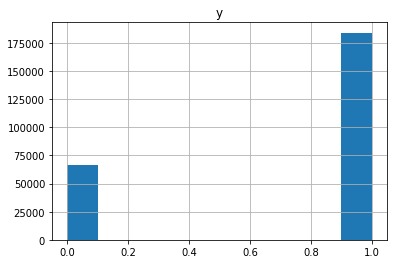

In [23]:
data3_noNA=data2_noNA.loc[1:250000,:]
data3_noNA.shape
data3_noNA
data3_noNA.hist(column='y')

In [46]:
data3_noNA.shape


(250000, 107)

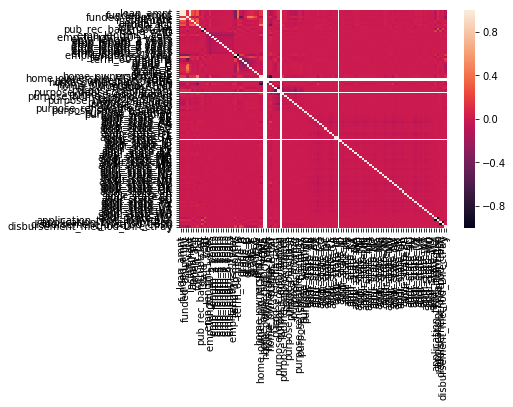

In [40]:
import seaborn as sns
corr = data3_noNA.corr()
sns.heatmap(corr, xticklabels = corr.columns.values ,yticklabels = corr.columns.values)

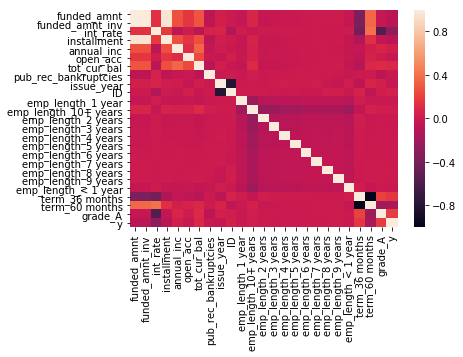

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

list1=[]
list1=list(range(1,25))
list1.append(106)

data3_noNA1=data3_noNA.iloc[:,list1]

corr = data3_noNA1.corr()
sns.heatmap(corr, xticklabels = corr.columns.values ,yticklabels = corr.columns.values)

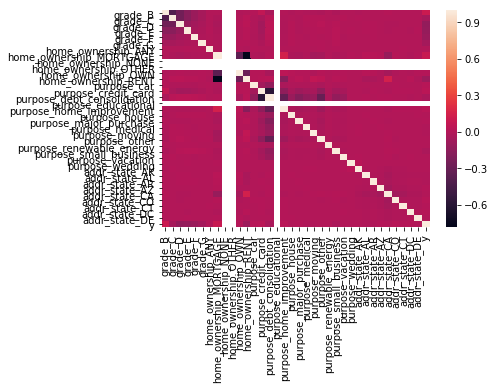

In [48]:
list1=[]
list1=list(range(25,60))
list1.append(106)

data3_noNA1=data3_noNA.iloc[:,list1]

corr = data3_noNA1.corr()
sns.heatmap(corr, xticklabels = corr.columns.values ,yticklabels = corr.columns.values)

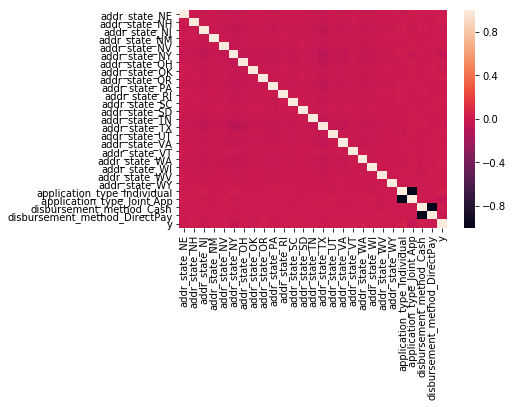

In [47]:
list1=[]
list1=list(range(80,106))
list1.append(106)

data3_noNA1=data3_noNA.iloc[:,list1]

corr = data3_noNA1.corr()
sns.heatmap(corr, xticklabels = corr.columns.values ,yticklabels = corr.columns.values)

In [49]:
y_train = data3_noNA.y 
X_train = data3_noNA.drop('y', axis=1) 

In [50]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,open_acc,tot_cur_bal,pub_rec_bankruptcies,issue_year,ID,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,term_36 months,term_60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
1,40000,40000,40000.0,16.14,975.71,45000.0,18.0,271068.0,0.0,2018,153,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,20000,20000,20000.0,7.56,622.68,100000.0,9.0,515779.0,0.0,2018,171,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
3,4500,4500,4500.0,11.31,147.99,38500.0,12.0,29137.0,0.0,2018,187,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
4,8425,8425,8425.0,27.27,345.18,450000.0,21.0,690320.0,0.0,2018,216,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5,20000,20000,20000.0,17.97,507.55,57000.0,10.0,33356.0,0.0,2018,270,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [51]:
print(y_train.shape)
X_train.shape

(250000,)


(250000, 106)

X_train is our data set and the test data it should be proiveded by kaggle so we will divide this train data to shceck our accuracy

In [52]:
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [53]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [54]:
# Logistic Regression
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)


Accuracy: 73.56
Accuracy CV 10-Fold: 73.22


In [55]:
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)


Accuracy: 77.68
Accuracy CV 10-Fold: 40.72


In [56]:
# Stochastic Gradient Descent
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)


Accuracy: 73.33
Accuracy CV 10-Fold: 70.12


In [57]:
 X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)


In [63]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1,activation='logistic' )
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
mlp.classes_

Iteration 1, loss = 0.57859091
Iteration 2, loss = 0.57843190
Iteration 3, loss = 0.57855596
Iteration 4, loss = 0.57845613
Iteration 5, loss = 0.57833466
Iteration 6, loss = 0.57841682
Iteration 7, loss = 0.57832603
Iteration 8, loss = 0.57838674
Iteration 9, loss = 0.57828509
Iteration 10, loss = 0.57837514
Iteration 11, loss = 0.57830721
Iteration 12, loss = 0.57832793
Iteration 13, loss = 0.57828029
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: 0.735313
Test set score: 0.737200


array([0, 1])

We can see that the best model is our n# Logistic Regression  that gives us a 73%acuracy(cvv) to determine if the costumer will completly pay on time the loan or not.